In [20]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


IMPORTING NECESSAY PACKAGES

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.metrics import classification_report, confusion_matrix
 
# deep learning libraries
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
 
import cv2
 
import warnings
warnings.filterwarnings('ignore')

LOADING DATASETS AND IMAGE FOLDERS

In [28]:

 
# datasets
labels = pd.read_csv(r"C:\DogBreedClassification\labels.csv")
sample = pd.read_csv(r'C:\DogBreedClassification\sample_submission.csv')
 
# folders paths
train_path = r"C:\DogBreedClassification\train-20240611T125315Z-001\train"
test_path = r"C:\DogBreedClassification\test-20240611T132445Z-001\test"

DISPLAYING FIRST FIVE RECORDS OF LABELS.csv

In [29]:
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

PREPROCESSING STEP1: JPG CONVERSION

In [30]:
def to_jpg(id):
    return id+".jpg"
 
 
labels['id'] = labels['id'].apply(to_jpg)
sample['id'] = sample['id'].apply(to_jpg)

BACKGROUND REMOVAL FUNCTION

In [ ]:
def background_removal(args):
    img_path, output_cls_path=args
    try:
        img=Image.open(img_path)
        img=img.convert('RGBA')
        img=remove(img)
        img=img.convert('RGB')
        img=img.resize((331,331))
    except Exception as e:
        print('Failed to process image {img_path}: {e}')

AGUMENTATION OF DATA USING TENSORFLOW

In [31]:
# Data agumentation and pre-processing using tensorflow
gen = ImageDataGenerator(
                  preprocessor_func=background_removal
                  rescale=1./255.,
                  horizontal_flip = True,
                  validation_split=0.2 # training: 80% data, validation: 20% data
                 )
 
train_generator = gen.flow_from_dataframe(
    labels, # dataframe
    directory = train_path, # images data path / folder in which images are there
    x_col = 'id',
    y_col = 'breed',
    subset="training",
    color_mode="rgb",
    target_size = (331,331), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
)
 
 
validation_generator = gen.flow_from_dataframe(
    labels, # dataframe
    directory = train_path, # images data path / folder in which images are there
    x_col = 'id',
    y_col = 'breed',
    subset="validation",
    color_mode="rgb",
    target_size = (331,331), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
)

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


 INPUT SHAPE OF ONE RECORD  

In [32]:
x,y = next(train_generator)
x.shape 

(32, 331, 331, 3)

VISUALIZING THE DATASET

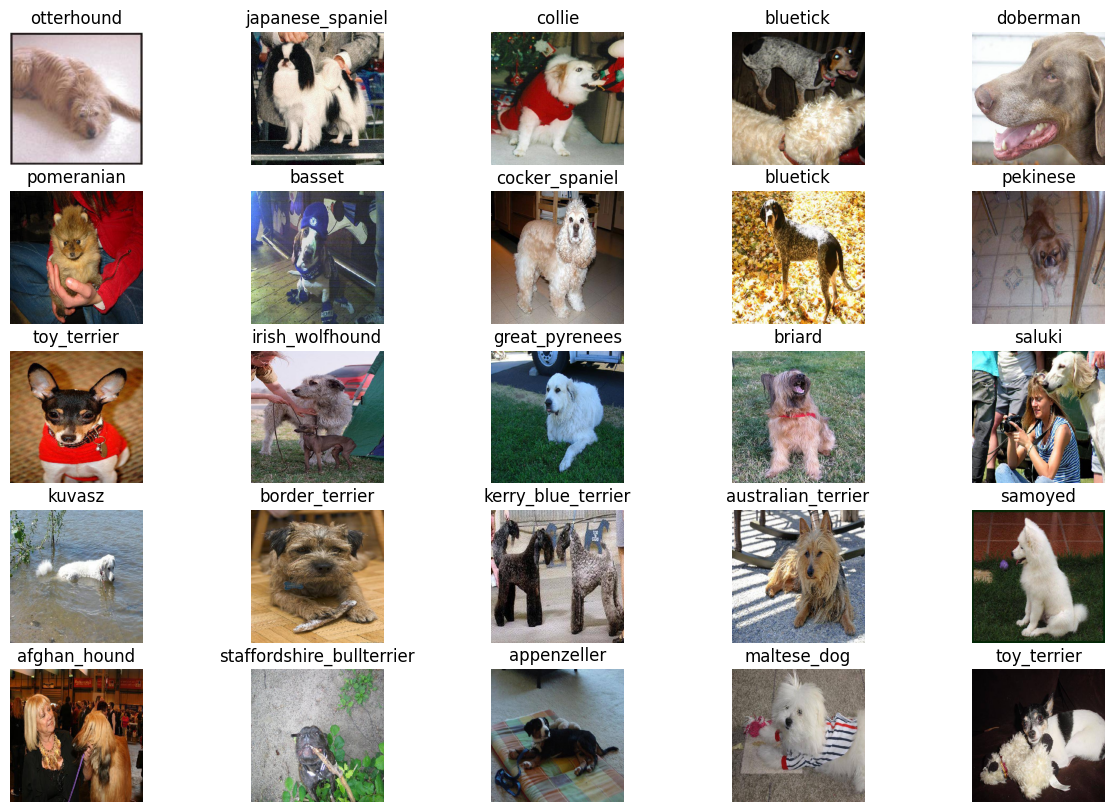

In [33]:
a = train_generator.class_indices
class_names = list(a.keys())  # storing class/breed names in a list
 
 
def plot_images(img, labels):
    plt.figure(figsize=[15, 10])
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
 
plot_images(x, y)

BUILDING DOG BREED CLASSIFICATION MODEL

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dense, Dropout

# Load the InceptionResNetV2 model pre-trained on ImageNet
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(331, 331, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers for classification
model = tf.keras.Sequential([
    base_model,
    BatchNormalization(),  # Using BatchNormalization without renorm
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(120, activation='softmax')  # Assuming there are 120 dog breeds
])

# Provide dummy input data to the model to build it
dummy_input = tf.zeros((1, 331, 331, 3))  # Assuming input shape (1, 331, 331, 3)
model(dummy_input)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (1, 9, 9, 1536)        │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_407         │ (1, 9, 9, 1536)        │         6,144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (1, 1536)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (1, 512)               │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 256)               │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1, 256)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (1, 128)               │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (1, 120)               │        15,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,309,528 (210.99 MB)

 Trainable params: 969,720 (3.70 MB)

 Non-trainable params: 54,339,808 (207.29 MB)

COMPILATION OF THE MODEL

In [35]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for 
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model

SUMMARIZING THE MODEL

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (1, 9, 9, 1536)        │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_407         │ (1, 9, 9, 1536)        │         6,144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (1, 1536)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (1, 512)               │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 256)               │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1, 256)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (1, 128)               │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (1, 120)               │        15,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,309,528 (210.99 MB)

 Trainable params: 969,720 (3.70 MB)

 Non-trainable params: 54,339,808 (207.29 MB)

DEFINING THE CALLBACKS TO PRESERVE BEST RESULTS

In [37]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)
# early stopping call back

TRAINING MODEL

In [38]:
batch_size = 32
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size
 
# Fit model
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=15,
                    callbacks=[early])


Epoch 1/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 1548s 6s/step - accuracy: 0.5424 - loss: 2.2457 - val_accuracy: 0.8998 - val_loss: 0.3939
Epoch 2/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9375 - loss: 0.2584 - val_accuracy: 0.9643 - val_loss: 0.1365
Epoch 3/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 1429s 6s/step - accuracy: 0.8741 - loss: 0.4913 - val_accuracy: 0.8988 - val_loss: 0.4080
Epoch 4/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7812 - loss: 0.6455 - val_accuracy: 0.8214 - val_loss: 0.4521
Epoch 5/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 1423s 6s/step - accuracy: 0.8789 - loss: 0.4586 - val_accuracy: 0.9023 - val_loss: 0.3939
Epoch 6/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9062 - loss: 0.3491 - val_accuracy: 0.9643 - val_loss: 0.6130
Epoch 7/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 1422s 6s/step - accuracy: 0.9000 - loss: 0.3683 - val_accuracy: 0.9137 - val_loss: 0.4210
Epoch 8/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8750 - loss: 0.6661 - val_

SAVING THE MODEL

In [39]:
model.save("Model.h5")

VISUALIZING THE MODEL'S PERFORMANCE

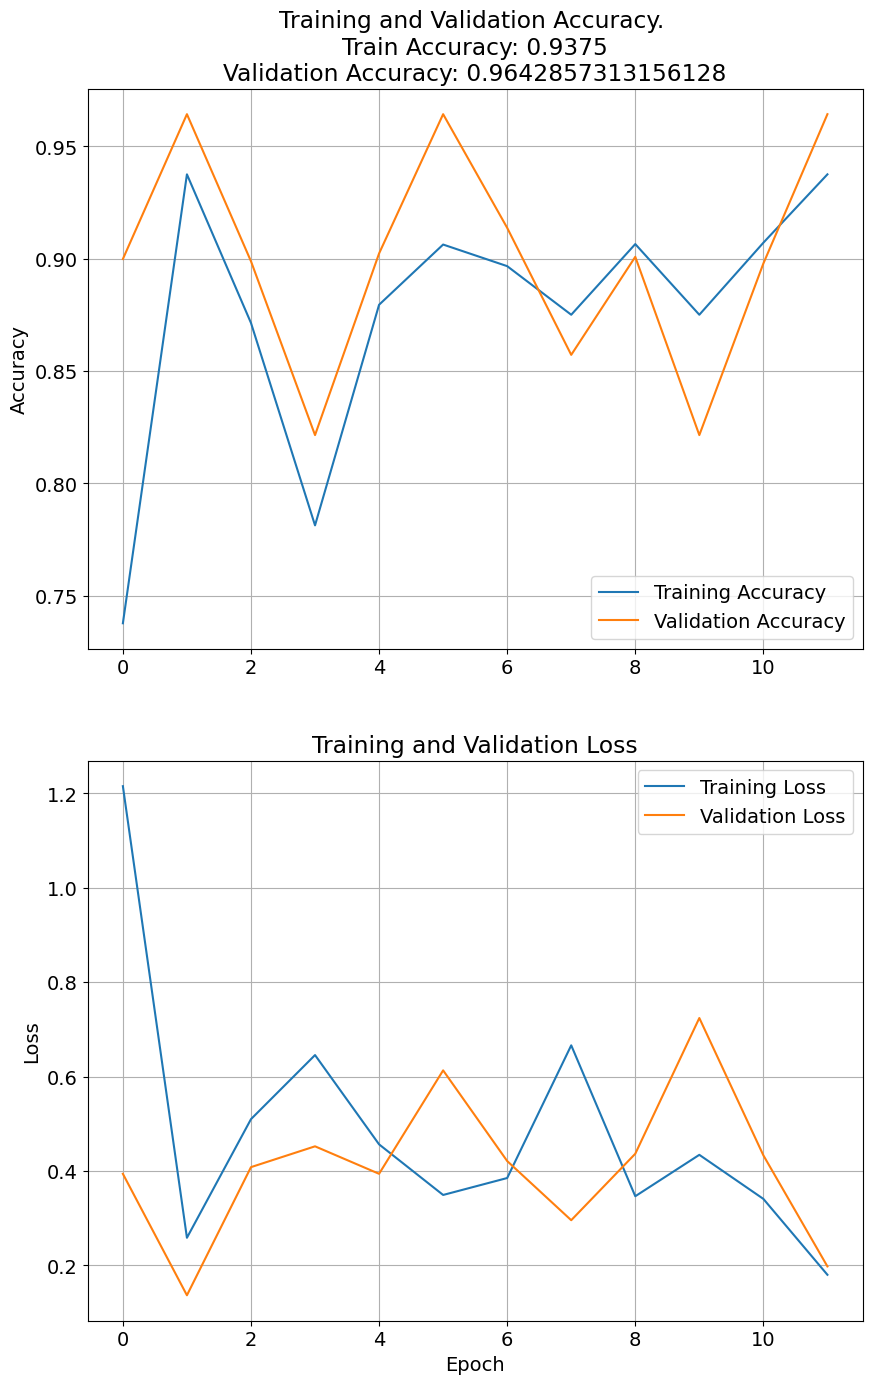

In [43]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot results
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'Training and Validation Accuracy. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.xlabel('Epoch')
plt.show()


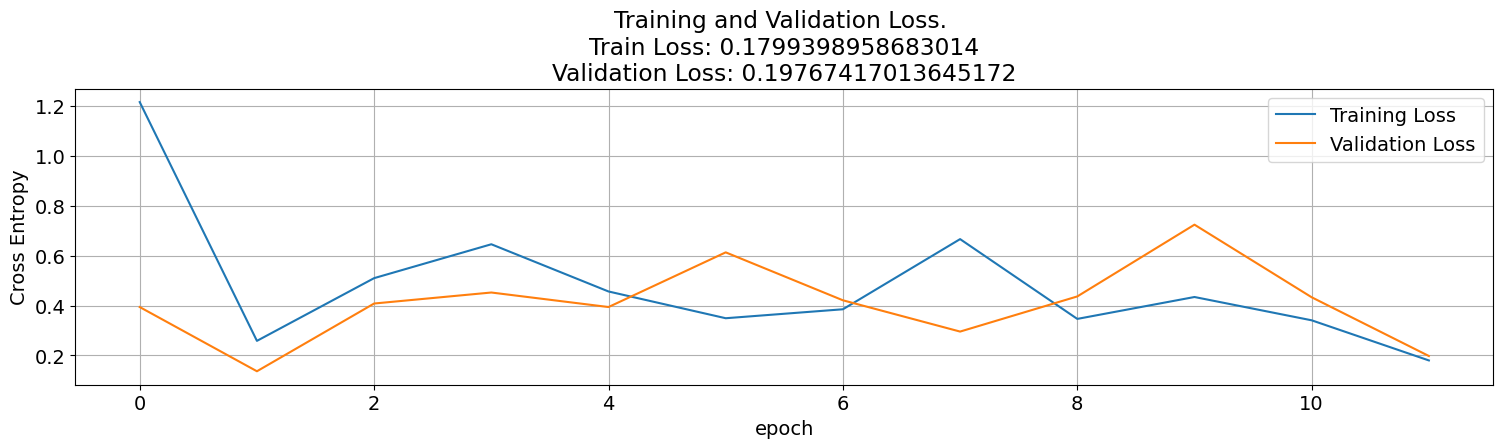

In [45]:
# Loss plot
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {loss[-1]}\nValidation Loss: {val_loss[-1]}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()


EVALUATING ACCURACY OF THE MODEL 

In [46]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 
 
print("Loss: ",accuracy_score[0])

64/64 ━━━━━━━━━━━━━━━━━━━━ 353s 5s/step - accuracy: 0.8984 - loss: 0.3805
[0.39163246750831604, 0.8967710137367249]
Accuracy: 89.6771%
Loss:  0.39163246750831604


VIEWING A TEST IMAGE

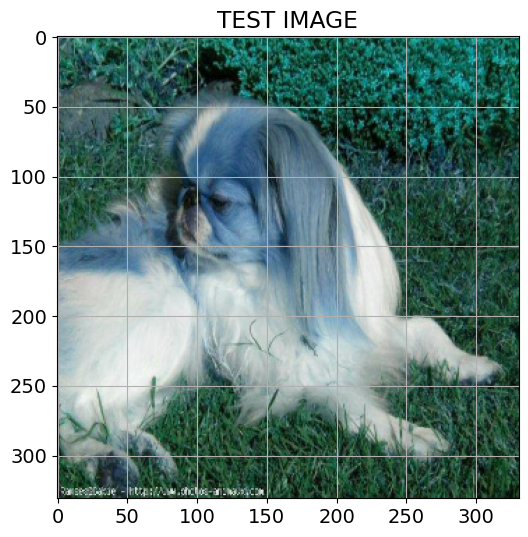

In [47]:
test_img_path = test_path+"/000621fb3cbb32d8935728e48679680e.jpg"
 
img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255
 
plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])

PREDICTIONS ON THE TEST DATA

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf

predictions = []

for image in sample.id:
    img = tf.keras.preprocessing.image.load_img(test_path + '/' + image)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))
    img = tf.reshape(img, (-1, 331, 331, 3))
    prediction = model.predict(img / 255)
    predictions.append(np.argmax(prediction))

my_submission = pd.DataFrame({'image_id': sample.id, 'label': predictions})
my_submission.to_csv('submission.csv', index=False)

# Submission file output
print("Submission File: \n---------------\n")
print(my_submission.head(5))  # Displaying first five predicted outputs


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


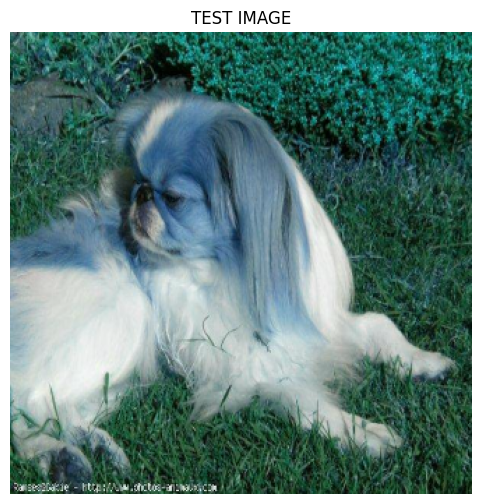

Top 5 predictions:
scottish_deerhound: 0.1189
norwich_terrier: 0.0458
curly-coated_retriever: 0.0454
cairn: 0.0319
bernese_mountain_dog: 0.0294

All breed probabilities:
affenpinscher: 0.0015
afghan_hound: 0.0074
african_hunting_dog: 0.0144
airedale: 0.0047
american_staffordshire_terrier: 0.0012
appenzeller: 0.0080
australian_terrier: 0.0034
basenji: 0.0025
basset: 0.0254
beagle: 0.0015
bedlington_terrier: 0.0180
bernese_mountain_dog: 0.0294
black-and-tan_coonhound: 0.0025
blenheim_spaniel: 0.0025
bloodhound: 0.0041
bluetick: 0.0066
border_collie: 0.0047
border_terrier: 0.0071
borzoi: 0.0090
boston_bull: 0.0063
bouvier_des_flandres: 0.0027
boxer: 0.0099
brabancon_griffon: 0.0013
briard: 0.0018
brittany_spaniel: 0.0124
bull_mastiff: 0.0048
cairn: 0.0319
cardigan: 0.0123
chesapeake_bay_retriever: 0.0048
chihuahua: 0.0003
chow: 0.0090
clumber: 0.0243
cocker_spaniel: 0.0099
collie: 0.0209
curly-coated_retriever: 0.0454
dandie_dinmont: 0.0012
dhole: 0.0029
dingo: 0.0008
doberman: 0.0026
eng

In [7]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.layers import Layer

test_path = r"C:\DogBreedClassification\test-20240611T132445Z-001\test"

# Define the custom layer with the necessary argument
class CustomScaleLayer(Layer):
    def __init__(self, scale=1.0, **kwargs):
        super(CustomScaleLayer, self).__init__(**kwargs)
        self.scale = scale

    def call(self, inputs):
        # Check if the input is a list of tensors
        if isinstance(inputs, list):
            return [input_tensor * self.scale for input_tensor in inputs]
        else:
            return inputs * self.scale

    def get_config(self):
        config = super(CustomScaleLayer, self).get_config()
        config.update({'scale': self.scale})
        return config

# Function to preprocess the input image
def preprocess_image(test_image_path):
    img = cv2.imread(test_image_path)
    resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3) / 255.0
    return resized_img

# Load the breed names from labels.csv
label_df = pd.read_csv('labels.csv')  # Replace with the correct path
breed_labels = label_df['breed'].unique()  # Assuming 'breed' column has the breed names

# Ensure breed_labels are sorted or ordered correctly if needed
breed_labels.sort()

# Load the pre-trained model
with custom_object_scope({'CustomScaleLayer': CustomScaleLayer}):
    model = load_model('Model.h5')  # Replace with the correct path

# Path to the test image
test_img_path = test_path+"/000621fb3cbb32d8935728e48679680e.jpg"  # Replace with the actual path

# Preprocess the image
preprocessed_img = preprocess_image(test_img_path)

# Predict probabilities for each breed
predictions = model.predict(preprocessed_img)

# Display the input image
plt.figure(figsize=(6, 6))
plt.title("TEST IMAGE")
plt.imshow(preprocessed_img[0])
plt.axis('off')
plt.show()

# Map the model output to breed names and their corresponding probabilities
top_indices = np.argsort(predictions[0])[::-1]
top_breeds = [(breed_labels[i], predictions[0][i]) for i in top_indices]

# Print the top 5 predictions with their probabilities
print("Top 5 predictions:")
for breed, prob in top_breeds[:5]:
    print(f"{breed}: {prob:.4f}")

# Print the full list of predictions
print("\nAll breed probabilities:")
for breed, prob in zip(breed_labels, predictions[0]):
    print(f"{breed}: {prob:.4f}")


model1=load_model("Model");
image 